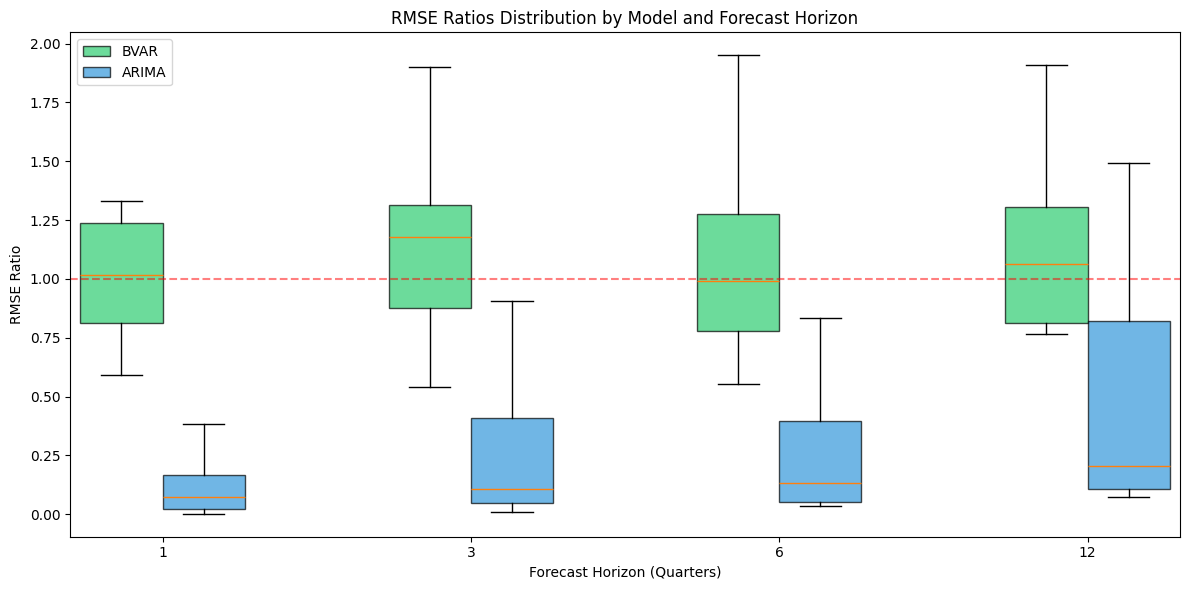

In [194]:
# Assuming your RMSE ratios are stored in dataframes for both models
# Create figure
plt.figure(figsize=(12, 6))

# Define colors
bvar_color = '#2ecc71'  # green
arima_color = '#3498db'  # blue

# Create positions for the boxes
positions = np.arange(len(horizons)) * 3
width = 0.8

# Create boxplots
bvar_plot = plt.boxplot([results[h]['bvar_ratios'] for h in horizons],
                        positions=positions - width/2,
                        widths=width,
                        patch_artist=True,
                        showfliers=False)  # This excludes outliers

arima_plot = plt.boxplot([results[h]['arima_ratios'] for h in horizons],
                         positions=positions + width/2,
                         widths=width,
                         patch_artist=True,
                         showfliers=False)  # This excludes outliers

# Color the boxes
for box in bvar_plot['boxes']:
    box.set_facecolor(bvar_color)
    box.set_alpha(0.7)
for box in arima_plot['boxes']:
    box.set_facecolor(arima_color)
    box.set_alpha(0.7)

# Customize the plot
plt.xlabel('Forecast Horizon (Quarters)')
plt.ylabel('RMSE Ratio')
plt.title('RMSE Ratios Distribution by Model and Forecast Horizon')

# Set x-axis ticks at the center of each group
plt.xticks(positions, horizons)

# Add legend
plt.legend([bvar_plot["boxes"][0], arima_plot["boxes"][0]], 
          ['BVAR', 'ARIMA'], 
          loc='upper left')

# Add a horizontal line at y=1 to show the baseline
plt.axhline(y=1, color='red', linestyle='--', alpha=0.5)

# Adjust layout
plt.tight_layout()

plt.show()